# Prepare Shear

Prepare the shear waveform for ringdown analysis


1. Load the NR shear
1. Convert the NR delta_t to dimensionful delta_t
1. Find the scaling mass M that is necessary to achieve 1/sampling_freq delta_t
1. Make sure the length is upto analysis_duration


The analysis_duration is chosen to be 0.5s

Caveats
1. The QNM frequencies are not rescaled with the remnant mass of the system.

# Load the NR shear

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import config

config.conf_matplolib()


Msun = 2 * 1e30
G = 6.6743 * 1e-11
c = 2.99792458 * 1e8
Mrem = 1

Tc = G * Msun * Mrem / (c**3)

target_sf = 4096
target_delta_t = 1 / target_sf

In [72]:
Tc, 4.925490947641267e-06

(4.9542008619300655e-06, 4.925490947641267e-06)

In [73]:
analysis_duration = 0.5

In [74]:
sim_name = "q0p5a0_v"

In [75]:
data_dir = f"/mnt/pfs/vaishak.p/shear_data/{sim_name}/"

np_file = "quasilocalmeasures-qlm_newman_penrose..asc"

np_dat = np.genfromtxt(data_dir + np_file)

try:
    bhdiag_file = "BH_diagnostics.ah3.gp"
    bhdiag_dat = np.genfromtxt(data_dir + bhdiag_file)

    bhdiag_dat[:, 1]

    merger_time = bhdiag_dat[0, 1]

except:
    merger_time = None

In [76]:
np_dat.shape, bhdiag_dat.shape

NameError: name 'bhdiag_dat' is not defined

In [77]:
sstart = 0

In [78]:
time_axis = np_dat[:, 8]

shear3_p = np_dat[:, 28]
shear3_x = np_dat[:, 29]

if merger_time is None:
    merger_ind = np.where(np.diff(shear3_p) != 0)[0][0]
    print(merger_ind)
    merger_time = time_axis[merger_ind]
    print(merger_time)

3476
1429.98270171627


In [79]:
shear3_p

array([ 0.        ,  0.        ,  0.        , ..., -0.0002227 ,
       -0.00022311, -0.00022155])

In [80]:
tloc = np.argmin(abs(time_axis - merger_time))

orig_delta_t = time_axis[tloc + 4] - time_axis[tloc + 3]

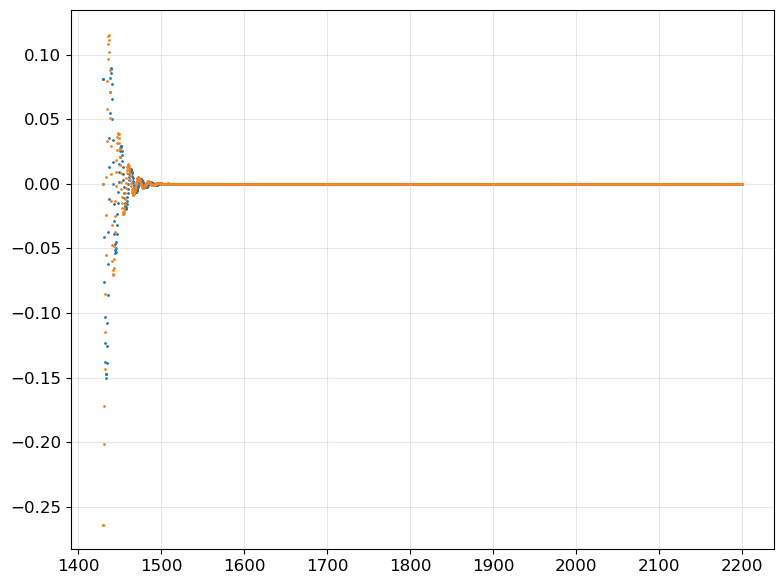

In [81]:
plt.scatter(time_axis[tloc:], shear3_p[tloc:], s=1)
plt.scatter(time_axis[tloc:], shear3_x[tloc:], s=1)
plt.show()

In [82]:
target_delta_t

0.000244140625

In [12]:
delta_t

NameError: name 'delta_t' is not defined

In [83]:
fmult = np.genfromtxt(data_dir + "quasilocalmeasures-qlm_multipole_moments..asc")

mass3 = fmult[-1, 14]
spin3 = fmult[-1, 44]

print(mass3, spin3)

0.961526745064573 0.576368470828952


In [84]:
Msource = 0.961527303884847

In [85]:
time_axis /= mass3
merger_time /= mass3

Target delta_t is  0.000244140625
Default delta_t is  2.1196456195009094e-06
Target Mrem is  115.17992571677392
Original duration is  0.45678710937712924
Deficit time is  0.04321289062287076


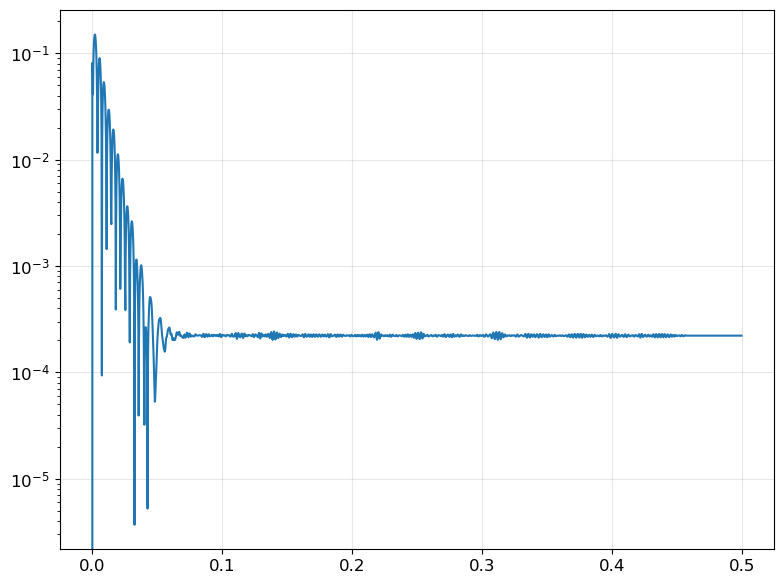

Final duration  0.499755859375


In [86]:
dimf_time_axis = (time_axis[tloc:] - merger_time) * Tc

delta_t = dimf_time_axis[1]

target_Mrem = target_delta_t / delta_t

print("Target delta_t is ", target_delta_t)
print("Default delta_t is ", delta_t)
print("Target Mrem is ", target_Mrem)

dimf_time_axis *= target_Mrem

shp = shear3_p[tloc + sstart :]
shx = shear3_x[tloc + sstart :]

dur = dimf_time_axis[-1]

print("Original duration is ", dur)

deficit = analysis_duration - dur

print("Deficit time is ", deficit)
if deficit < 0:
    raise ValueError
else:

    nz = int(deficit / target_delta_t)

    zros = list(np.zeros(nz))
    ons = np.ones(nz)

    mpfloor = np.mean(shp[-25:])
    mxfloor = np.mean(shx[-25:])

    shp = np.array(list(shp) + list(ons * mpfloor))
    shx = np.array(list(shx) + list(ons * mxfloor))
    sht = np.arange(len(shp)) * target_delta_t

ndur = sht[-1]


fig, ax = plt.subplots()
ax.set_yscale("log")
ax.plot(sht, abs(shp))
# ax.set_xlim(0, 0.001)
plt.show()

print("Final duration ", ndur)

In [87]:
print("Signal duration", sht[-1])

Signal duration 0.499755859375


In [88]:
data = np.array([sht, shp, shx]).T
np.savetxt(f"shear_dimf_{sim_name}_M{target_Mrem}_ss{sstart}.txt", data)

In [25]:
Mrem

1

In [70]:
sstart

45